<a href="https://colab.research.google.com/github/violet417/Linear_Algebra_Study/blob/main/%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98_%EC%8A%A4%ED%84%B0%EB%94%94_1%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1장 수학 기호

### 1.1 그리스 문자

$$\alpha$$ 
$$\beta$$
$$\gamma$$
$$\delta$$
$$\epsilon$$
$$\zeta$$
$$\eta$$
$$\theta$$
$$\kappa$$
$$\lambda$$
$$\mu$$
$$\nu$$
$$\xi$$
$$\pi$$
$$\rho$$
$$\sigma$$
$$\tau$$
$$\phi$$
$$\chi$$
$$\psi$$
$$\omega$$

## 2장 넘파이(NumPy)로 공부하는 선형대수

### 2.1 데이터와 행렬

In [31]:
import numpy as np  # 넘파이 패키지(선형대수)
import matplotlib.pylab as plt  # 맷플롯립 패키지(시각화)

In [32]:
!apt -qq -y install fonts-nanum  # 나눔글꼴을 설치
!rm ~/.cache/matplotlib -rf  # Matplotlib의 캐시를 삭제 → 런타임 재시작

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [33]:
import matplotlib.font_manager as fm

# 나눔글꼴 설치 후 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 한글 폰트 이름 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [34]:
# 넘파이를 사용한 벡터 표현
# 2차원 배열
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

In [35]:
# 1차원 배열
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

#### 연습 문제 2.1.1
NumPy를 사용해서 붓꽃 데이터 x2에 대한 벡터 변수 x2를 만든다.

- 사이킷런 패키지에서 제공하는 MNIST 숫자 이미지(digit image) 데이터셋 이용  
- 이 데이터는 0부터 9까지의 숫자를 손으로 쓴 후에 8x8 해상도의 이미지로 스캔한 것  

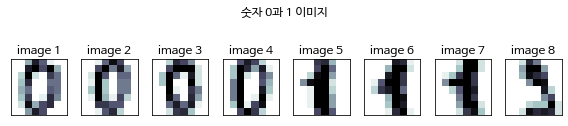

In [36]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])  # digits.images를 통해 이미지 데이터를 불러와서 리스트 d에 저장

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)  # 1행 8열의 그리드 형태로 시각화
    # plt.imshow()는 행렬 형태의 2차원 데이터를 색깔로 표시
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)  # interpolation: 이미지 출력 보간법, 'nearest' 값은 가장 가까운 픽셀 값을 이용해 보간하는 방법 / cmap: 데이터 수치를 색으로 바꾸는 함수
    plt.grid(False); plt.xticks([]); plt.yticks([])  # 불필요한 눈금 제거
    plt.title("image {}".format(i + 1))  # 이미지의 제목 설정

plt.suptitle("숫자 0과 1 이미지")  # 전체 시각화의 제목 설정
plt.tight_layout()  # 여백 조정
plt.show()  # 시각화 출력

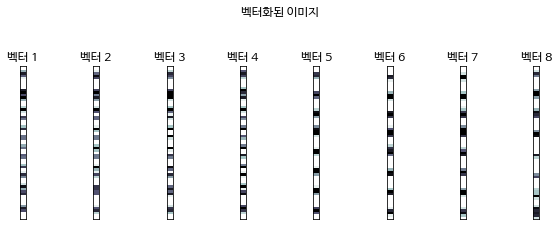

In [37]:
# 2차원 이미지를 64-크기의 1차원 벡터로 펼치면
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 64x1 크기의 벡터로 변환하여 리스트 v에 저장
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)  # 1행 8열의 그리드 형태로 시각화
    plt.imshow(v[i], aspect=0.4,  # 각 이미지의 가로 세로 비율을 0.4로 설정 / aspect: 이미지의 폭(값이 작을수록 두터워짐)
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("벡터 {}".format(i + 1))
plt.suptitle("벡터화된 이미지", y=1.05)  # y=1.05: 그래프의 상단에서부터 1.05배 높이에 위치하도록 설정
plt.tight_layout(w_pad=7)  # 서브플롯들 간의 가로 간격을 7픽셀로 설정
plt.show()

In [38]:
X_digits = digits.data
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#### 연습 문제 2.1.2  
- 넘파이를 사용해서 붓꽃 데이터 X에 대한 행렬 변수 X를 만든다.

In [39]:
from sklearn.datasets import load_iris  # 사이킷런 패키지 임포트

iris = load_iris()  # 데이터 로드
iris.data[0, :]  # 첫 번째 꽃의 데이터

array([5.1, 3.5, 1.4, 0.2])

In [40]:
X_iris = iris.data
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
A = np.array([[11,12,13],[21,22,23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

In [42]:
# 텐서

from scipy import misc  # 패키지 임포트

img_rgb = misc.face()  # 컬러 이미지 로드
img_rgb.shape  # 데이터의 모양

<ipython-input-42-8af154b28668>:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img_rgb = misc.face()  # 컬러 이미지 로드


(768, 1024, 3)

이미지는 크기가 768 x 1024이고 3개의 채널이 있으므로 768 x 1024 x 3 크기의 3차원 텐서

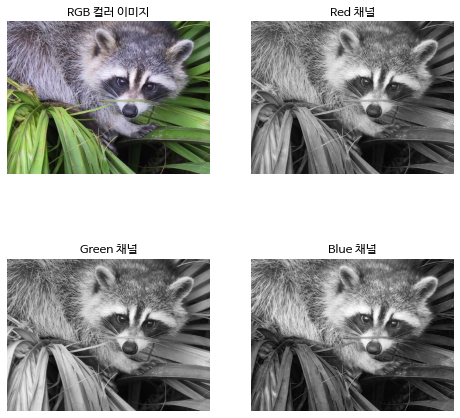

In [43]:
plt.figure(figsize=(8, 8))  # 새로운 figure 생성 및 크기 지정

plt.subplot(221)  # 그래프 영역을 2x2 그리드로 나눈 후, 첫 번째 영역에 대한 subplot 그리기
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB 컬러 이미지")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red 채널")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  # green 채널 출력
plt.axis("off")
plt.title("Green 채널")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  # blue 채널 출력
plt.axis("off")
plt.title("Blue 채널")

plt.show()

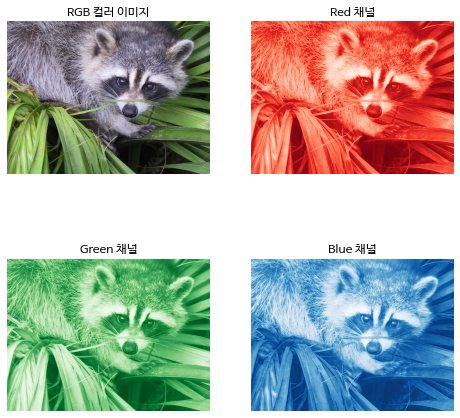

In [44]:
plt.figure(figsize=(8, 8))  # 새로운 figure 생성 및 크기 지정

plt.subplot(221)  # 그래프 영역을 2x2 그리드로 나눈 후, 첫 번째 영역에 대한 subplot 그리기
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB 컬러 이미지")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.Reds_r)  # red 채널 출력
plt.axis("off")
plt.title("Red 채널")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.Greens_r)  # green 채널 출력
plt.axis("off")
plt.title("Green 채널")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.Blues_r)  # blue 채널 출력
plt.axis("off")
plt.title("Blue 채널")

plt.show()

In [45]:
# 전치 연산
A.T

array([[11, 21],
       [12, 22],
       [13, 23]])

In [46]:
x1

array([5.1, 3.5, 1.4, 0.2])

In [47]:
x1.T

array([5.1, 3.5, 1.4, 0.2])

#### 연습 문제 2.1.3
- NumPy를 사용해서 붓꽃 데이터 X의 전치행렬 XT을 구한다.  
- NumPy를 사용해서 위 전치행렬을 다시 전치한 행렬 (XT)T을 구한다. 이 행렬과 원래 행렬 X을 비교한다. 

In [48]:
xt = X_iris.T
xt

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

In [49]:
xt_t = xt.T
xt_t

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### 연습 문제 2.1.4
- 영벡터, 일벡터, 정방행렬, 대각행렬, 항등행렬, 대칭행렬의 예를 하나씩 만들어본다.  
- 위의 벡터와 행렬을 NumPy로 나타내 본다.

In [50]:
# 영벡터
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

In [51]:
# 일벡터
np.ones((3, 1))

array([[1.],
       [1.],
       [1.]])

In [52]:
#  대각 정방행렬
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [53]:
# 항등행렬
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [54]:
# 항등행렬
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### 2.2 벡터와 행렬의 연산

In [55]:
# 벡터의 덧셈과 뺄셈
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

x + y

array([10, 12, 14, 16, 18])

In [56]:
x - y

array([10, 10, 10, 10, 10])

In [57]:
# 행렬의 덧셈과 뺄셈
np.array([[5, 6], [7, 8]]) + np.array([[10, 20], [30, 40]]) - \
    np.array([[1, 2], [3, 4]])

array([[14, 24],
       [34, 44]])